# KNN 이진분류(Citrus 데이터셋)

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 준비

In [233]:
# !wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/citrus.csv

In [234]:
df = pd.read_csv('citrus.csv')
df.shape

(10000, 6)

In [235]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


## 2. 전체 정보 확인

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [237]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


### 범주형 변수

In [238]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [239]:
# 오렌지와 그레이프 후르츠의 갯수 확인
df['name'].value_counts()

,count
name,
orange,5000
grapefruit,5000


### 연속형 변수

In [240]:
# 오렌지 데이터만 추출
df_orange = df[df['name'] == 'orange']
df_orange

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
4995,orange,12.22,217.00,170,89,3
4996,orange,12.28,217.04,167,76,16
4997,orange,12.55,218.07,143,77,4
4998,orange,12.75,230.13,159,87,5


In [241]:
df_grapefruit = df[df['name'] == 'grapefruit']
df_grapefruit

,name,diameter,weight,red,green,blue
5000,grapefruit,7.63,126.79,150,74,24
5001,grapefruit,7.69,133.98,150,43,15
5002,grapefruit,7.72,135.56,150,54,21
5003,grapefruit,7.77,135.62,150,75,15
5004,grapefruit,7.84,136.63,149,77,20
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


<Axes: xlabel='weight', ylabel='Count'>

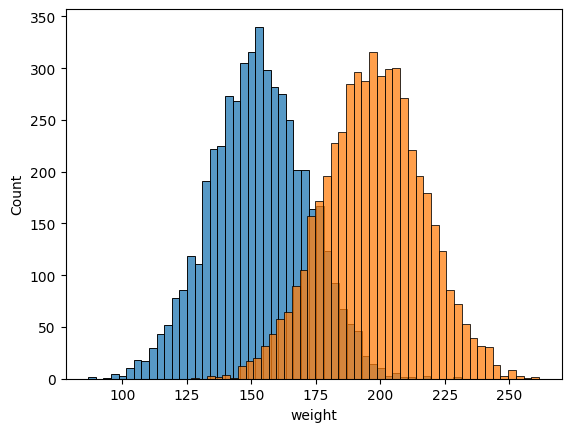

In [242]:
# 시각화
sns.histplot(data=df_orange, x = 'weight')
sns.histplot(data=df_grapefruit, x = 'weight')

## 3. 결측치

In [243]:
df.isna().sum()

,0
name,0
diameter,0
weight,0
red,0
green,0
blue,0


<Axes: >

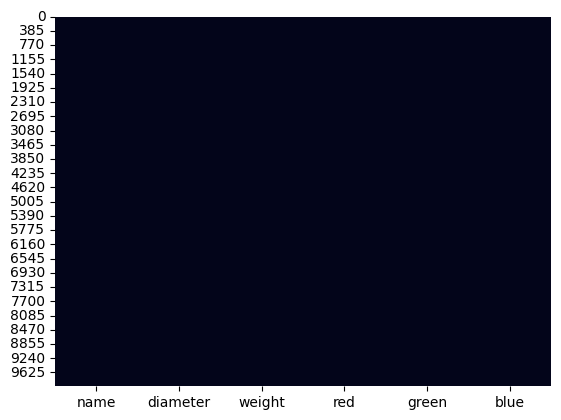

In [244]:
sns.heatmap(df.isna(), cbar=False)

In [245]:
# 이상치, 중복치 확인

## 4. 데이터 분리
- 학습용, 검증용, 테스트용 데이터 분리

In [246]:
# 데이터를 섞음
df = df.sample(frac = 1)

In [247]:
idx_train = int(len(df) * 0.6)
idx_val = int(len(df) * 0.8)

In [248]:
train = df.iloc[:idx_train, :]
val = df.iloc[idx_train:idx_val, :]
test = df.iloc[idx_val:, :]

In [249]:
train.shape, val.shape, test.shape

((6000, 6), (2000, 6), (2000, 6))

### X, y 데이터 분리

In [250]:
train.head()

,name,diameter,weight,red,green,blue
9934,grapefruit,14.19,240.23,165,72,2
111,orange,5.87,115.16,168,77,9
3200,orange,8.92,159.52,166,91,4
3872,orange,9.42,167.22,156,80,2
589,orange,6.98,131.13,165,91,2


In [251]:
X_train = train[['diameter',	'weight', 'red', 'green', 'blue']]
y_train = train['name']

In [252]:
X_val = val.drop('name', axis = 1)
y_val = val['name']

In [253]:
u = X_train.mean()
u

,0
diameter,9.981930
weight,175.144627
red,153.886167
green,76.090167
blue,11.309000


In [254]:
# 표준편차
std = X_train.std()
std

,0
diameter,1.947897
weight,29.213678
red,10.504456
green,11.702715
blue,9.037337


In [255]:
X_train_s = (X_train - u)/std
X_train_s

,diameter,weight,red,green,blue
9934,2.160315,2.227908,1.058011,-0.349506,-1.030060
111,-2.110959,-2.053306,1.343604,0.077745,-0.255496
3200,-0.545168,-0.534839,1.153209,1.274049,-0.808756
3872,-0.288480,-0.271264,0.201232,0.334096,-1.030060
589,-1.541114,-1.506644,1.058011,1.274049,-1.030060
...,...,...,...,...,...
3580,-0.416824,-0.398944,-0.369954,0.248646,0.519069
1754,-1.012338,-1.007906,1.819593,1.274049,-1.030060
1446,-1.120147,-1.123947,0.296430,0.761348,-1.030060
1621,-1.063676,-1.053432,0.106034,0.932248,-1.030060


In [256]:
X_val_s = (X_val - u)/std
X_val_s

,diameter,weight,red,green,blue
4461,0.019544,0.036811,1.724395,0.334096,-0.366148
5226,-0.293614,-0.364714,-0.465152,-0.947658,2.732110
8011,0.923083,0.942551,-1.226733,-0.605857,0.740373
864,-1.381968,-1.367326,0.010837,0.761348,-1.030060
5211,-0.314149,-0.395179,-1.417129,-0.605857,-1.030060
...,...,...,...,...,...
1467,-1.115013,-1.117101,1.343604,-0.349506,-1.030060
2926,-0.627307,-0.630000,0.296430,2.043101,-0.034191
6193,0.327569,0.288405,1.438802,-1.374909,-1.030060
3286,-0.519499,-0.506770,-1.131536,1.444950,-1.030060


### 레이블 인코딩

In [257]:
label_dict = {'grapefruit': 0, 'orange': 1}
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict)

## 5. 학습

In [258]:
type(X_train_s), type(y_train_e), type(X_val_s), type(y_val_e)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [259]:
# numpy array
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()
X_val_s = X_val_s.to_numpy()
y_val_e = y_val_e.to_numpy()

In [260]:
X_train_s.shape, y_train_e.shape

((6000, 5), (6000,))

In [261]:
X_val_s.shape, y_val_e.shape

((2000, 5), (2000,))

### 베이스 모델

In [262]:
from sklearn.neighbors import KNeighborsClassifier

In [263]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s, y_train_e)

KNeighborsClassifier()

## 검증

In [264]:
y_pred = clf.predict(X_val_s)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [265]:
(y_pred == y_val_e).sum()/len(y_val_e)

0.921

In [266]:
for i in range(5, 30):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train_s, y_train_e)
  y_pred = clf.predict(X_val_s)
  acc = (y_pred == y_val_e).sum()/len(y_val_e)
  print(f'k = {i}, acc = {acc}')

k = 5, acc = 0.921
k = 6, acc = 0.9205
k = 7, acc = 0.921
k = 8, acc = 0.92
k = 9, acc = 0.9195
k = 10, acc = 0.9195
k = 11, acc = 0.9185
k = 12, acc = 0.9195
k = 13, acc = 0.9185
k = 14, acc = 0.9195
k = 15, acc = 0.921
k = 16, acc = 0.9205
k = 17, acc = 0.9205
k = 18, acc = 0.9215
k = 19, acc = 0.923
k = 20, acc = 0.921
k = 21, acc = 0.922
k = 22, acc = 0.922
k = 23, acc = 0.923
k = 24, acc = 0.9225
k = 25, acc = 0.924
k = 26, acc = 0.923
k = 27, acc = 0.9225
k = 28, acc = 0.923
k = 29, acc = 0.925


### 베스트 모델

In [267]:
clf = KNeighborsClassifier(n_neighbors=28)
clf.fit(X_train_s, y_train_e)

KNeighborsClassifier(n_neighbors=28)

In [268]:
y_pred = clf.predict(X_val_s)
acc = (y_pred == y_val_e).sum()/len(y_val_e)
print(f'k = {28}, acc = {acc}')

k = 28, acc = 0.923


### Confusion Matrix 시각화

In [269]:
from sklearn.metrics import confusion_matrix

In [270]:
cfm = confusion_matrix(y_val_e, y_pred)
cfm

array([[911,  77],
       [ 77, 935]])

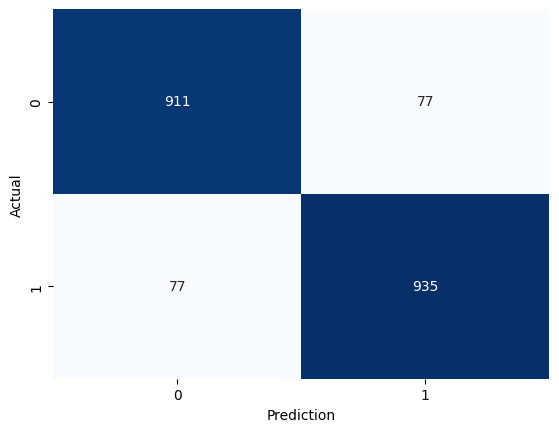

In [271]:
s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
s.set(xlabel='Prediction', ylabel='Actual')
plt.show()

## 6. 테스트

### X, y 분리

In [272]:
X_test = test.drop('name', axis=1)
y_test = test['name']

In [273]:
X_test.shape, y_test.shape

((2000, 5), (2000,))

### 스케일링

In [274]:
X_test_s = (X_test - u)/std
X_test_s

,diameter,weight,red,green,blue
1411,-1.135548,-1.136612,0.391627,0.163196,-0.587452
1378,-1.145815,-1.154412,0.201232,0.761348,-1.030060
2849,-0.652976,-0.655673,0.296430,-0.605857,-1.030060
4786,0.353237,0.322978,1.534000,-0.093155,0.076461
8723,1.190038,1.189353,-0.179559,-0.093155,0.740373
...,...,...,...,...,...
5490,-0.057462,-0.092581,0.962814,-0.007705,1.514937
9015,1.318381,1.319087,0.391627,-1.204008,-0.366148
5008,-0.925065,-1.196173,-1.131536,0.419547,-0.476800
8569,1.128433,1.126711,-2.178710,-0.776757,0.297765


### 인코딩

In [275]:
y_test_e = y_test.map(label_dict)

In [276]:
# to_numpy()
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

In [277]:
type(X_test_s), type(y_test_e)

(numpy.ndarray, numpy.ndarray)

In [278]:
X_test_s.shape, y_test_e.shape

((2000, 5), (2000,))

### 예측

In [279]:
y_pred = clf.predict(X_test_s)
acc = (y_pred == y_test_e).sum()/len(y_test_e)
print('accuracy: ', acc)

accuracy:  0.9225


## 성능평가

In [280]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [281]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred)
  pre = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  print('acc: ', acc)
  print('recall: ', np.arround(re, 4))
  print('precision: ', np.arround(pre, 4))
  print('f1: ', np.arround(f1, 4))

  cfv = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

## End